#### libraries

In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#### Load data

In [59]:
data = pd.read_csv("csv-1 2.csv")
data.head()

,index,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,0,2009,MDW,Midwest,NHIS,None,ABCS,None,None,Risk Factors,...,Gender,Male,C2,T15,NS010,AgeStdz,BOC02,GEN01,9002,NaN
1,1,2009,SOU,South,NHIS,None,None,Healthy People 2020,None,Risk Factors,...,Race,Non-Hispanic Black,C2,T14,NS011,Crude,BOC04,RAC02,9003,NaN
2,2,2009,MDW,Midwest,NHIS,Million Hearts,None,None,None,Cardiovascular Diseases,...,Gender,Female,C1,T6,NS004,Crude,BOC02,GEN02,9002,NaN
3,3,2013,SOU,South,NHIS,None,None,None,None,Cardiovascular Diseases,...,Overall,Overall,C1,T1,NS001,Crude,BOC01,OVR01,9003,NaN
4,4,2010,MDW,Midwest,NHIS,None,ABCS,None,None,Risk Factors,...,Age,18-24,C2,T15,NS010,Crude,BOC03,AGE01,9002,NaN


#### Prepare the data

In [60]:
X = data[['Year', 'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic', 'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Break_Out_Category', 'Break_Out']]
y = data['Data_Value_Alt']
X.head()

,Year,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Break_Out_Category,Break_Out
0,2009,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Age-Standardized,Percent (%),Gender,Male
1,2009,None,None,Healthy People 2020,None,Risk Factors,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,Percent (%),Race,Non-Hispanic Black
2,2009,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),Gender,Female
3,2013,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),Overall,Overall
4,2010,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Crude,Percent (%),Age,18-24


In [61]:
# clear the X
X = X.dropna()

# clear the Y
y = y.dropna()

# Check the data in x
print(X.isnull().sum())

# Check the data in y
print(y.isnull().sum())

Year                  0
PriorityArea1         0
PriorityArea2         0
PriorityArea3         0
PriorityArea4         0
Category              0
Topic                 0
Indicator             0
Data_Value_Type       0
Data_Value_Unit       0
Break_Out_Category    0
Break_Out             0
dtype: int64
0


In [62]:
X.head()

,Year,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Break_Out_Category,Break_Out
0,2009,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Age-Standardized,Percent (%),Gender,Male
1,2009,None,None,Healthy People 2020,None,Risk Factors,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,Percent (%),Race,Non-Hispanic Black
2,2009,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),Gender,Female
3,2013,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),Overall,Overall
4,2010,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Crude,Percent (%),Age,18-24


In [63]:
# Convert categorical variables into numerical labels
le = LabelEncoder()
X['PriorityArea1'] = le.fit_transform(X['PriorityArea1'])
X['PriorityArea2'] = le.fit_transform(X['PriorityArea2'])
X['PriorityArea3'] = le.fit_transform(X['PriorityArea3'])
X['PriorityArea4'] = le.fit_transform(X['PriorityArea4'])
X['Category'] = le.fit_transform(X['Category'])
X['Topic'] = le.fit_transform(X['Topic'])
X['Indicator'] = le.fit_transform(X['Indicator'])
X['Data_Value_Type'] = le.fit_transform(X['Data_Value_Type'])
X['Data_Value_Unit'] = le.fit_transform(X['Data_Value_Unit'])
X['Break_Out_Category'] = le.fit_transform(X['Break_Out_Category'])
X['Break_Out'] = le.fit_transform(X['Break_Out'])

In [64]:
# Split the data into training and testing sets
split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Create a model
model = tf.keras.models.Sequential([    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


## sequential model with three fully connected layers

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)


Epoch 1/50
317/317 [==============================] - 2s 4ms/step - loss: 2848.2466 - mae: 23.0506 - val_loss: 322.6496 - val_mae: 14.5882
Epoch 2/50
317/317 [==============================] - 1s 3ms/step - loss: 292.1080 - mae: 10.9156 - val_loss: 322.9673 - val_mae: 14.4847
Epoch 3/50
317/317 [==============================] - 1s 2ms/step - loss: 286.3867 - mae: 10.6973 - val_loss: 305.2347 - val_mae: 14.1291
Epoch 4/50
317/317 [==============================] - 1s 2ms/step - loss: 282.0741 - mae: 10.5718 - val_loss: 385.4535 - val_mae: 14.9452
Epoch 5/50
317/317 [==============================] - 1s 2ms/step - loss: 274.9854 - mae: 10.3219 - val_loss: 324.1184 - val_mae: 13.9783
Epoch 6/50
317/317 [==============================] - 1s 3ms/step - loss: 271.8612 - mae: 10.1829 - val_loss: 249.9654 - val_mae: 12.8417
Epoch 7/50
317/317 [==============================] - 1s 3ms/step - loss: 268.1478 - mae: 9.9913 - val_loss: 222.4496 - val_mae: 12.2520
Epoch 8/50
317/317 [==============

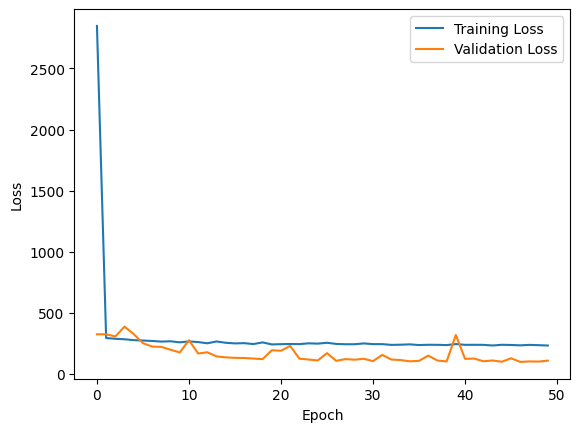

In [66]:
# Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss over time
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


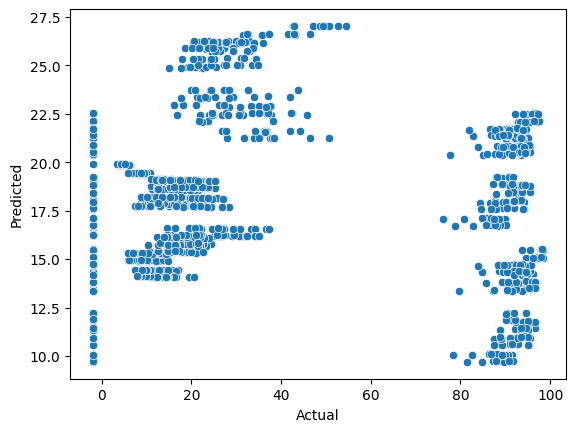

In [67]:
import seaborn as sns

# Create dataframe of actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Plot actual vs. predicted values
sns.scatterplot(data=results, x='Actual', y='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
